In [9]:
#loading necessary libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
data=pd.read_csv(r"C:\Users\KIIT\Downloads\Covid Vaccine Tweets\vaccination_all_tweets.csv")
data.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False


In [11]:
data.drop(columns=['id', 'user_created', 'user_friends', 'retweets', 'favorites', 'is_retweet'], inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228207 entries, 0 to 228206
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   user_name         228205 non-null  object
 1   user_location     161296 non-null  object
 2   user_description  211189 non-null  object
 3   user_followers    228207 non-null  int64 
 4   user_favourites   228207 non-null  int64 
 5   user_verified     228207 non-null  bool  
 6   date              228207 non-null  object
 7   text              228207 non-null  object
 8   hashtags          178504 non-null  object
 9   source            228088 non-null  object
dtypes: bool(1), int64(2), object(7)
memory usage: 15.9+ MB


In [16]:
data=data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116057 entries, 0 to 228206
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   user_name         116057 non-null  object
 1   user_location     116057 non-null  object
 2   user_description  116057 non-null  object
 3   user_followers    116057 non-null  int64 
 4   user_favourites   116057 non-null  int64 
 5   user_verified     116057 non-null  bool  
 6   date              116057 non-null  object
 7   text              116057 non-null  object
 8   hashtags          116057 non-null  object
 9   source            116057 non-null  object
dtypes: bool(1), int64(2), object(7)
memory usage: 9.0+ MB


In [19]:
unique_locations_count = data['user_location'].nunique()
print(unique_locations_count)

21255


In [20]:
locations_counts = data['user_location'].value_counts()
print(locations_counts)

Bengaluru, India                  7237
India                             6335
New Delhi, India                  2369
Toronto, Canada  and Worldwide    1828
United States                     1508
                                  ... 
here & now (...San Diego, CA)        1
Oak Ridge, TN                        1
Camrose, Alberta, Canada             1
Gold Saucer                          1
Southern  Africa                     1
Name: user_location, Length: 21255, dtype: int64


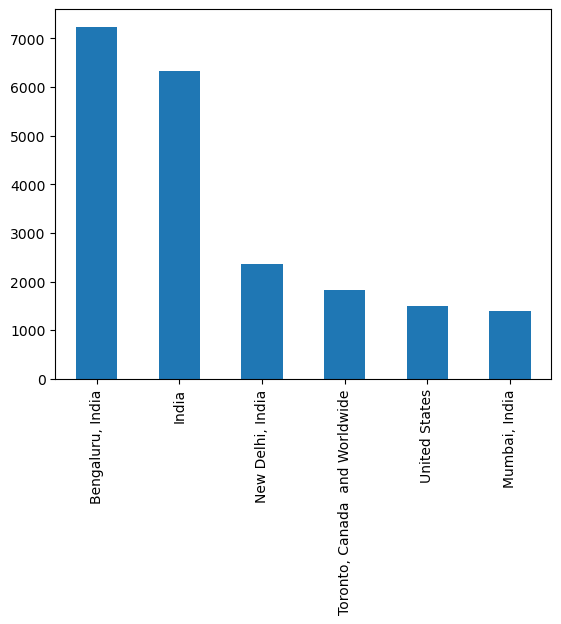

In [22]:
filtered_locations_counts = locations_counts[locations_counts > 1000]
filtered_locations_counts.plot(kind='bar')
plt.show()

In [23]:
# Create a mask for rows where 'user_location' contains 'India'
mask = data['user_location'].str.contains('India', na=False)

# Assign 'India' to all rows where the mask is True
data.loc[mask, 'user_location'] = 'India'
# Create a new column 'country' based on the 'user_location' column
data['country'] = data['user_location'].where(~mask, other='India')

In [29]:
country_counts = data['country'].value_counts()
print(country_counts)

India                             25909
Toronto, Canada  and Worldwide     1828
United States                      1508
New Delhi                           998
Beijing, China                      948
                                  ...  
Nanded                                1
 12 Tuglaq lane, INDIA🇮🇳              1
Beirut - Lebanon                      1
ನಮ್ಮ ಬೆಂಗಳೂರು                         1
Southern  Africa                      1
Name: country, Length: 19955, dtype: int64


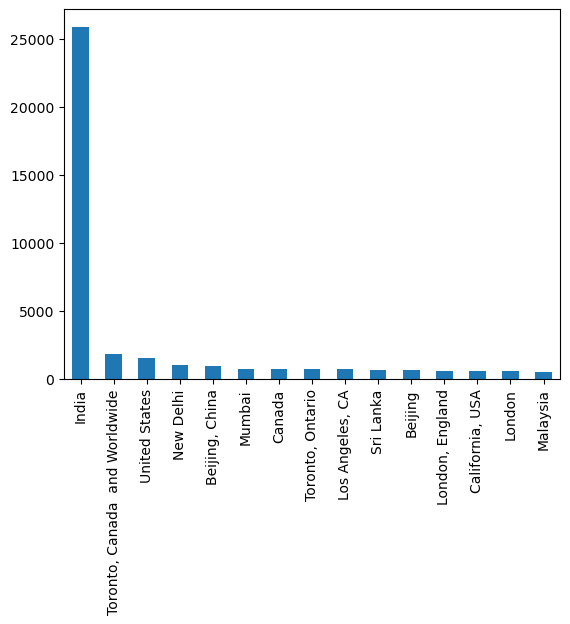

In [30]:
filtered_country_counts = country_counts[country_counts > 500]
filtered_country_counts.plot(kind='bar')
plt.show()

In [36]:
users_count=data['user_verified'].value_counts()

Text(0.5, 1.0, 'Count of Verified users and Unverified users')

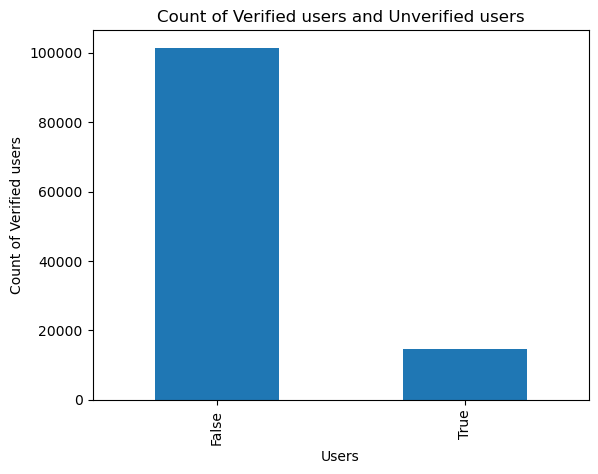

In [39]:
users_count.plot(kind='bar')
plt.xlabel('Users')
plt.ylabel('Count of Verified users')
plt.title('Count of Verified users and Unverified users')

In [42]:
data.drop(columns=['user_followers','user_favourites','user_location','source','hashtags'],inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116057 entries, 0 to 228206
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   user_name         116057 non-null  object
 1   user_description  116057 non-null  object
 2   user_verified     116057 non-null  bool  
 3   date              116057 non-null  object
 4   text              116057 non-null  object
 5   country           116057 non-null  object
dtypes: bool(1), object(5)
memory usage: 5.4+ MB


In [43]:
data['date'] = pd.to_datetime(data['date'])

In [44]:
data.head()

,user_name,user_description,user_verified,date,text,country
0,Rachel Roh,Aggregator of Asian American news; scanning di...,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,"La Crescenta-Montrose, CA"
2,eli🇱🇹🇪🇺👌,"heil, hydra 🖐☺",False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,Your Bed
6,Gunther Fehlinger,End North Stream 2 now - the pipeline of corru...,False,2020-12-12 20:06:00,it is a bit sad to claim the fame for success ...,"Austria, Ukraine and Kosovo"
9,Ch.Amjad Ali,#ProudPakistani #LovePakArmy #PMIK @insafiansp...,False,2020-12-12 19:30:33,#CovidVaccine \n\nStates will start getting #C...,Islamabad
10,Tamer Yazar,"Im Market Analyst, also Editor... working (fre...",False,2020-12-12 19:29:07,"while deaths are closing in on the 300,000 mar...",Turkey-Israel


In [47]:
# Remove opening and closing brackets
data.text = data.text.str.strip("[']")
# remove all quotes too
data.text = data.text.str.replace(" ', '", ",", regex = False)

In [49]:
import time
import pandas as pd
import nltk as nltk
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [53]:
import time
import nltk

# Download stopwords resource
nltk.download('stopwords')

# Rest of your code
start = time.time()
cache = set(stopwords.words("english"))

def remove_stopwords(words):
    new_text = " ".join([word for word in words.split() if word not in cache])
    return new_text

data.text=data.text.apply(remove_stopwords)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [62]:
data.text = data.text.str.strip("#")
data['text'] = data['text'].str.replace(r'#\S+', '', regex=True)

In [63]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Create the vader sentiment analyser (there are others in NLTK you can try too)
vader_sentiment = SentimentIntensityAnalyzer()
# Hutto, C.J. & Gilbert, E.E. (2014). VADER: A Parsimonious Rule-based Model for Sentiment Analysis of Social Media Text. Eighth International Conference on Weblogs and Social Media (ICWSM-14). Ann Arbor, MI, June 2014.

# There are 3 possibilities of input for a text:
# It could be "No Negative", in which case, return 0
# It could be "No Positive", in which case, return 0
# It could be a review, in which case calculate the sentiment
def calc_sentiment(words):    
    if words == "No Negative" or words == "No Positive":
        return 0
    return vader_sentiment.polarity_scores(words)["compound"]

In [76]:
start=time.time()
data["Sentiment_score"] = data.text.apply(calc_sentiment)
end=time.time()
print("Calculating sentiment took " + str(round(end - start, 2)) + " seconds")

Calculating sentiment took 27.11 seconds


In [78]:
def sentiment_score(score):
    if score > 0.6:
        return "It's a positive comment"
    else:
        return "It's a negative comment"
data['Sentiment_score'].apply(sentiment_score)

71870     It's a negative comment
30915     It's a negative comment
30916     It's a negative comment
92572     It's a negative comment
30097     It's a negative comment
                   ...           
155470    It's a positive comment
185192    It's a positive comment
32867     It's a positive comment
32868     It's a positive comment
217415    It's a positive comment
Name: Sentiment_score, Length: 116057, dtype: object

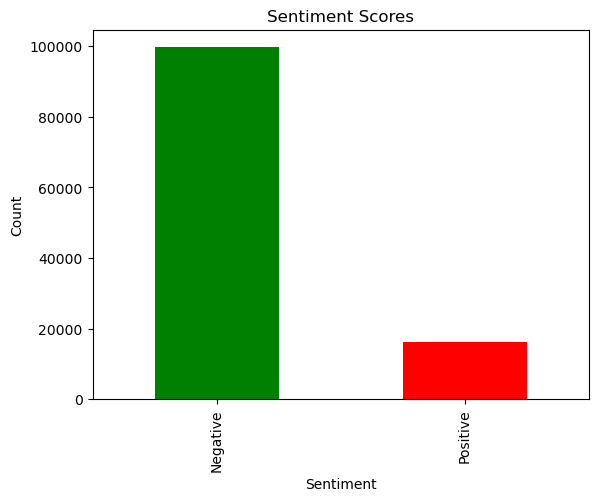

In [79]:
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame and it has a 'sentiment_score' column
# Categorize sentiments
data['Sentiment_Category'] = data['Sentiment_score'].apply(lambda x: 'Positive' if x > 0.6 else 'Negative')

# Count the occurrences of each category
sentiment_counts = data['Sentiment_Category'].value_counts()

# Plot the counts
sentiment_counts.plot(kind='bar', color=['green', 'red'])
plt.title('Sentiment Scores')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


In [80]:
data=data.drop(columns=['user_description','Sentiment'])
data.head()

,user_name,user_verified,date,text,country,Sentiment_score,Sentiment_Category
71870,Pennsylvania Governor KILLS 12000,False,2021-05-17 18:51:13,TERRIBLE TERRIBLE TERRIBLE 2 week long side ef...,"Poconos, USA",-0.9717,Negative
30915,Raj Meister,False,2021-03-17 10:29:35,SputnikV causes NO Harms NO Issues NO Health W...,"Leeds, England",-0.9682,Negative
30916,Raj Meister,False,2021-03-17 10:29:23,@BBCPolitics causes NO Harms NO Issues NO Hea...,"Leeds, England",-0.9682,Negative
92572,Anonymous Human / ಅನಾಮದೇಯ ಮಾನವ/अनाम मानव,False,2021-06-07 17:29:18,fuck 2nd doze delhi fucked up???? getting pan...,India,-0.9621,Negative
30097,Jeremiah Marsh PeoplesLobby,False,2021-03-16 20:11:09,STOP THE MURDER!! THIS IS INSANE!!! killer h...,From an objective perspective,-0.9599,Negative


In [81]:
data['text']

71870     TERRIBLE TERRIBLE TERRIBLE 2 week long side ef...
30915     SputnikV causes NO Harms NO Issues NO Health W...
30916     @BBCPolitics  causes NO Harms NO Issues NO Hea...
92572     fuck  2nd doze delhi fucked up???? getting pan...
30097     STOP THE MURDER!! THIS IS INSANE!!!  killer  h...
                                ...                        
155470    To  heroes took part  trial, guys truly wonder...
185192    @KizzyPhD @McLellan_Lab @moderna_tx Wow thank ...
32867     GOD BLESS HOLY  VICTORY TRIUMPH JUSTICE. GOD B...
32868     @mod_russia GOD BLESS HOLY  VICTORY TRIUMPH JU...
217415    A VERY HAPPY  TO ALL, Beautiful Begginings, Fr...
Name: text, Length: 116057, dtype: object